In [39]:
# Import package pandas for data analysis
# Set to display enough columns
import pandas as pd
pd.set_option('display.max_columns', 100)

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Import to allow PDF of multiple pages
from matplotlib.backends.backend_pdf import PdfPages

# Import Seaborn for visualistaion library
import seaborn as sns

# Import to allow date to be converted to day of the week
import datetime

import math
import os

#For showing plots directly in the notebook run the command below
%matplotlib inline

In [40]:
# Read in csv file for bike. Header not included with data so added here.
df = pd.read_csv('results_bikes.csv', names=['address', 'contract_name', 'name', 'last_update', 'lng', 'lat', 'status', 'available_bikes', 'bonus', 'available_bike_stands', 'number', 'bike_stands', 'banking'])
df['last_update'] = pd.to_datetime(df['last_update'], format = '%Y-%m-%d %H:%M:%S')


In [41]:
df_weather = pd.read_csv('results_weather.csv', names=['city_id', 'last_update', 'city_name', 'longitude', 'latitude', 'weather_id', 'weather_description', 'weather_main', 'main_temp', 'main_pressure', 'main_humidity', 'main_temp_min', 'main_temp_max', 'main_sea_level', 'main_wind_speed', 'main_wind_direction', 'main_clouds', 'main_rain_volume_1h', 'main_rain_volume_3h', 'main_snow_volume_1h', 'main_snow_volume_3h', 'base', 'main_grnd_level', 'sys_id', 'sys_type', 'sys_message', 'sys_country', 'sys_sunrise', 'sys_sunset', 'cod', 'weather_icon'])
df_weather['last_update'] = pd.to_datetime(df_weather['last_update'], format = '%Y-%m-%d %H:%M:%S')


In [42]:
# Check how many rows and columns the dataframe has
print ('The file has', df.shape[0], 'rows and', df.shape[1], 'columns')
print ('The file has', df_weather.shape[0], 'rows and', df_weather.shape[1], 'columns')


The file has 1177519 rows and 13 columns
The file has 3870 rows and 31 columns


In [43]:
df_weather.head(5)

,city_id,last_update,city_name,longitude,latitude,weather_id,weather_description,weather_main,main_temp,main_pressure,main_humidity,main_temp_min,main_temp_max,main_sea_level,main_wind_speed,main_wind_direction,main_clouds,main_rain_volume_1h,main_rain_volume_3h,main_snow_volume_1h,main_snow_volume_3h,base,main_grnd_level,sys_id,sys_type,sys_message,sys_country,sys_sunrise,sys_sunset,cod,weather_icon
0,7778677,2019-02-18 22:00:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,279.64,1012.0,87.0,279.15,280.15,0.0,5.7,250.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0120,IE,2019-02-18 07:35:41,2019-02-18 17:42:53,200,09n
1,7778677,2019-02-18 22:30:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,279.58,1012.0,87.0,279.15,280.15,0.0,5.1,250.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0037,IE,2019-02-18 07:35:40,2019-02-18 17:42:54,200,09n
2,7778677,2019-02-20 06:00:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,283.15,1007.0,81.0,283.15,283.15,0.0,7.2,190.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0034,IE,2019-02-20 07:32:51,2019-02-20 17:45:27,200,09n
3,7778677,2019-02-20 06:30:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,283.58,1007.0,76.0,283.15,284.15,0.0,7.7,200.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0034,IE,2019-02-20 07:32:48,2019-02-20 17:45:30,200,09n
4,7778677,2019-02-20 07:00:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,283.64,1007.0,81.0,283.15,284.15,0.0,7.2,200.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0035,IE,2019-02-20 07:32:45,2019-02-20 17:45:33,200,09n


In [44]:
#df.loc[df['number'] == 116]

In [45]:
df_weather.head(5)

,city_id,last_update,city_name,longitude,latitude,weather_id,weather_description,weather_main,main_temp,main_pressure,main_humidity,main_temp_min,main_temp_max,main_sea_level,main_wind_speed,main_wind_direction,main_clouds,main_rain_volume_1h,main_rain_volume_3h,main_snow_volume_1h,main_snow_volume_3h,base,main_grnd_level,sys_id,sys_type,sys_message,sys_country,sys_sunrise,sys_sunset,cod,weather_icon
0,7778677,2019-02-18 22:00:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,279.64,1012.0,87.0,279.15,280.15,0.0,5.7,250.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0120,IE,2019-02-18 07:35:41,2019-02-18 17:42:53,200,09n
1,7778677,2019-02-18 22:30:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,279.58,1012.0,87.0,279.15,280.15,0.0,5.1,250.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0037,IE,2019-02-18 07:35:40,2019-02-18 17:42:54,200,09n
2,7778677,2019-02-20 06:00:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,283.15,1007.0,81.0,283.15,283.15,0.0,7.2,190.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0034,IE,2019-02-20 07:32:51,2019-02-20 17:45:27,200,09n
3,7778677,2019-02-20 06:30:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,283.58,1007.0,76.0,283.15,284.15,0.0,7.7,200.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0034,IE,2019-02-20 07:32:48,2019-02-20 17:45:30,200,09n
4,7778677,2019-02-20 07:00:00,Dublin City,-6.25,53.36,300,light intensity drizzle,Drizzle,283.64,1007.0,81.0,283.15,284.15,0.0,7.2,200.0,75.0,0.0,0.0,0.0,0.0,stations,0.0,1565,1,0.0035,IE,2019-02-20 07:32:45,2019-02-20 17:45:33,200,09n


In [46]:
# Check the earliest update on the weather
df_weather['last_update'].min()


Timestamp('2019-02-17 12:00:00')

Drop all rows from bike data where there is no corresponding weather data. 

In [47]:
df = df[(df['last_update'] > '2019-02-17 12:00:00')]

In [48]:
print ('The file has', df.shape[0], 'rows and', df.shape[1], 'columns')

The file has 1105362 rows and 13 columns


Date and time will need to be seperated in to columns. One for hours, one for minutes and one for day of the week. Make three new columns. Will also need to round to the closest 5 minutes as we will need to join the weather and bikes on the date/time information

In [49]:
# Check for duplicate rows - numerical only, does not show values
print('Duplicate rows bikes:', df.duplicated()[df.duplicated() == True].shape[0])
print('Duplicate rows weather:', df_weather.duplicated()[df_weather.duplicated() == True].shape[0])
# Check for duplicate columns - numerical only, does not show values
print('Duplicate columns bikes:',df.columns.size - df.columns.unique().size)
print('Duplicate columns weather:',df_weather.columns.size - df_weather.columns.unique().size)

Duplicate rows bikes: 0
Duplicate rows weather: 0
Duplicate columns bikes: 0
Duplicate columns weather: 0


In [50]:
# Convert date to a day of the week in a new column. 
# Create new column with hour
# Create new column with minute
# Do for both bikes and weather

df['weekday'] = df['last_update']
df['hour'] = df['last_update']
df['minute'] = df['last_update']
df['date'] = df['last_update']

df['weekday'] = df['weekday'].apply(lambda date: datetime.datetime.weekday(date))
df['hour'] = df['hour'].apply(lambda time: time.hour)
df['minute'] = df['minute'].apply(lambda time: math.floor(time.minute/5) * 5)
df['date'] = df['date'].apply(lambda date: str(date.day)+str(date.month)+str(date.year))

df_weather['weekday'] = df_weather['last_update']
df_weather['hour'] = df_weather['last_update']
df_weather['minute'] = df_weather['last_update']
df_weather['date'] = df_weather['last_update']

df_weather['weekday'] = df_weather['weekday'].apply(lambda date: datetime.datetime.weekday(date))
df_weather['hour'] = df_weather['hour'].apply(lambda time: time.hour)
df_weather['minute'] = df_weather['minute'].apply(lambda time: math.floor(time.minute/5) * 5)
df_weather['date'] = df_weather['date'].apply(lambda date: str(date.day)+str(date.month)+str(date.year))



**Note: The weekday column goes from 0 to 6. 0 is Monday and 6 is Sunday.** Change this to a 0 or 1 value for each day? Avoid applying weight to them. Might need to distinguish weekend and weekday.

In [51]:
# Join the two tables on the date and time
df = pd.merge(df, df_weather,how = 'outer', on=['date', 'hour', 'minute', 'weekday'
                                               ])

In [52]:
df = df.sort_values(by=['last_update_x', 'last_update_y'])

In [53]:
df.head(100)

,address,contract_name,name,last_update_x,lng,lat,status,available_bikes,bonus,available_bike_stands,number,bike_stands,banking,weekday,hour,minute,date,city_id,last_update_y,city_name,longitude,latitude,weather_id,weather_description,weather_main,main_temp,main_pressure,main_humidity,main_temp_min,main_temp_max,main_sea_level,main_wind_speed,main_wind_direction,main_clouds,main_rain_volume_1h,main_rain_volume_3h,main_snow_volume_1h,main_snow_volume_3h,base,main_grnd_level,sys_id,sys_type,sys_message,sys_country,sys_sunrise,sys_sunset,cod,weather_icon
56,South Dock Road,Dublin,SOUTH DOCK ROAD,2019-02-17 12:00:04,-6.231291,53.341833,OPEN,14.0,0.0,16.0,91.0,30.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
55,Benson Street,Dublin,BENSON STREET,2019-02-17 12:00:06,-6.233451,53.344153,CLOSED,0.0,0.0,3.0,90.0,40.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
13,Merrion Square East,Dublin,MERRION SQUARE EAST,2019-02-17 12:00:09,-6.246548,53.339434,OPEN,1.0,0.0,29.0,25.0,30.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
32,Newman House,Dublin,NEWMAN HOUSE,2019-02-17 12:00:09,-6.260590,53.337132,OPEN,13.0,0.0,27.0,53.0,40.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
62,King Street North,Dublin,KING STREET NORTH,2019-02-17 12:00:10,-6.273507,53.350291,OPEN,0.0,0.0,30.0,101.0,30.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
31,York Street East,Dublin,YORK STREET EAST,2019-02-17 12:00:13,-6.262003,53.338755,OPEN,12.0,0.0,20.0,52.0,32.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
52,Rothe Abbey,Dublin,ROTHE ABBEY,2019-02-17 12:00:18,-6.303950,53.338776,OPEN,24.0,0.0,11.0,85.0,35.0,1.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
0,Blessington Street,Dublin,BLESSINGTON STREET,2019-02-17 12:00:19,-6.268140,53.356769,OPEN,0.0,0.0,20.0,2.0,20.0,1.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
35,Sir Patrick's Dun,Dublin,SIR PATRICK DUN'S,2019-02-17 12:00:29,-6.240642,53.339218,OPEN,30.0,0.0,10.0,58.0,40.0,1.0,6,12,0,1722019,7778677.0,2019-02-17 12:00:00,Dublin City,-6.25,53.36,802.0,scattered clouds,Clouds,283.64,1004.0,62.0,283.15,284.15,0.0,8.2,210.0,40.0,0.0,0.0,0.0,0.0,stations,0.0,1565.0,1.0,0.0046,IE,2019-02-17 07:38:43,2019-02-17 17:40:05,200.0,03d
30,Excise Walk,Dublin,EXCISE WALK,2019-02-17 12:00:34,-6.244239,53.347777,OPEN,10.0,0.0,30.0,48.0,40.0,0.0,6,12,0,1722019,7778677.0,2019-02-17 12:

In [54]:
# Check for any columns with missing values
df.isnull().sum()


address                       1
contract_name                 1
name                          1
last_update_x                 1
lng                           1
lat                           1
status                        1
available_bikes               1
bonus                         1
available_bike_stands         1
number                        1
bike_stands                   1
banking                       1
weekday                       0
hour                          0
minute                        0
date                          0
city_id                  848906
last_update_y            848906
city_name                848906
longitude                848906
latitude                 848906
weather_id               848906
weather_description      848906
weather_main             848906
main_temp                848906
main_pressure            848906
main_humidity            848906
main_temp_min            848906
main_temp_max            848906
main_sea_level           848906
main_win

In [55]:
# Drop row where weather information has come in with no corresponding bike data
index = np.where(df['address'].isna())
df.drop(df.index[[index]], inplace = True)


Going to drop any unneccessary columns now to make the data more managable. There are several static columns that can be dropped. Last update is no longer required as it is included in the data broken out. Also going to drop some of the weather data that is not needed - the sea level and ground level etc. Will drop date also as no longer need. The weather descriptions will be dropped as they can be identified by the id. Drop rows where the status is closed. 

In [56]:
df.hour.value_counts()

17    56229
8     54843
16    54565
18    53192
7     53155
13    51956
12    51255
15    50129
9     49490
19    48948
14    48848
6     47161
11    46605
20    46118
10    45497
21    43927
22    42949
5     42182
23    40501
3     38589
4     38222
2     38166
0     37827
1     37056
Name: hour, dtype: int64

In [57]:
# Drop all rows where the value is closed
df = df[df.status != 'CLOSED']

In [58]:
# Drop bank holiday - not representative of usage
df = df[df.date != '1832019']

In [59]:
# Update the hour by 1 after March 31 to account for daylight savings
df['hour'] = np.where(df['last_update_x'] >= '2019-03-31 01:00', df['hour']+ 1, df['hour'])


In [60]:
df['hour'] = np.where(df['hour'] == 24, 0, df['hour'])


In [64]:
df.drop(['name', 'address', 'contract_name', 'lng', 'lat', 
         'available_bike_stands', 'last_update_x', 'last_update_y',
         'banking', 'city_id', 'city_name', 'longitude',
        'latitude', 'main_pressure', 'main_humidity', 'main_temp_min',
        'main_temp_max', 'main_sea_level', 'main_wind_direction',
        'main_clouds', 'main_rain_volume_3h', 'main_snow_volume_3h',
        'base', 'main_grnd_level', 'sys_id', 'sys_type',
        'sys_message', 'sys_message', 'sys_sunrise', 'sys_sunset',
        'cod', 'weather_icon', 'sys_country', 'bonus', 'date', 'status', 
        'bike_stands', 'weather_description', 'weather_main'], axis=1, inplace = True)



In [65]:
# Forward fill any rows with missing weather data
df = df.fillna(method='ffill')


In [67]:
# Check again for any null values. 
df.isnull().sum()


available_bikes        0
number                 0
weekday                0
hour                   0
minute                 0
weather_id             0
main_temp              0
main_wind_speed        0
main_rain_volume_1h    0
main_snow_volume_1h    0
dtype: int64

In [68]:
# Check data types
df.dtypes

available_bikes        float64
number                 float64
weekday                  int64
hour                     int64
minute                   int64
weather_id             float64
main_temp              float64
main_wind_speed        float64
main_rain_volume_1h    float64
main_snow_volume_1h    float64
dtype: object

In [69]:
# Select columns with continuous data.
df.select_dtypes(['float64', 'int64']).describe().T


,count,mean,std,min,25%,50%,75%,max
available_bikes,1095893.0,11.205338,10.842691,0.00,2.00,8.00,19.00,40.00
number,1095893.0,57.353413,32.573850,2.00,30.00,57.00,85.00,115.00
weekday,1095893.0,2.897070,1.943217,0.00,1.00,3.00,4.00,6.00
hour,1095893.0,11.921911,6.616840,0.00,7.00,12.00,17.00,23.00
minute,1095893.0,27.372102,17.270216,0.00,10.00,30.00,40.00,55.00
weather_id,1095893.0,698.254391,146.392257,300.00,520.00,801.00,803.00,804.00
main_temp,1095893.0,280.696666,3.268752,272.72,278.39,280.79,283.08,289.61
main_wind_speed,1095893.0,5.356643,2.872265,0.50,3.10,4.60,7.20,18.50
main_rain_volume_1h,1095893.0,0.321751,1.452218,0.00,0.00,0.00,0.00,23.88
main_snow_volume_1h,1095893.0,0.016657,0.303210,0.00,0.00,0.00,0.00,13.97


In [70]:
# Shows the median of each continuous column
df.select_dtypes(['float64', 'int64']).median()


available_bikes          8.00
number                  57.00
weekday                  3.00
hour                    12.00
minute                  30.00
weather_id             801.00
main_temp              280.79
main_wind_speed          4.60
main_rain_volume_1h      0.00
main_snow_volume_1h      0.00
dtype: float64

In [71]:
# Check the cardinality of continuous features
df.select_dtypes(['float64', 'int64']).nunique()


available_bikes          41
number                  113
weekday                   7
hour                     24
minute                   12
weather_id               20
main_temp              1131
main_wind_speed          38
main_rain_volume_1h      91
main_snow_volume_1h      12
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a223776a0>,
      dtype=object)

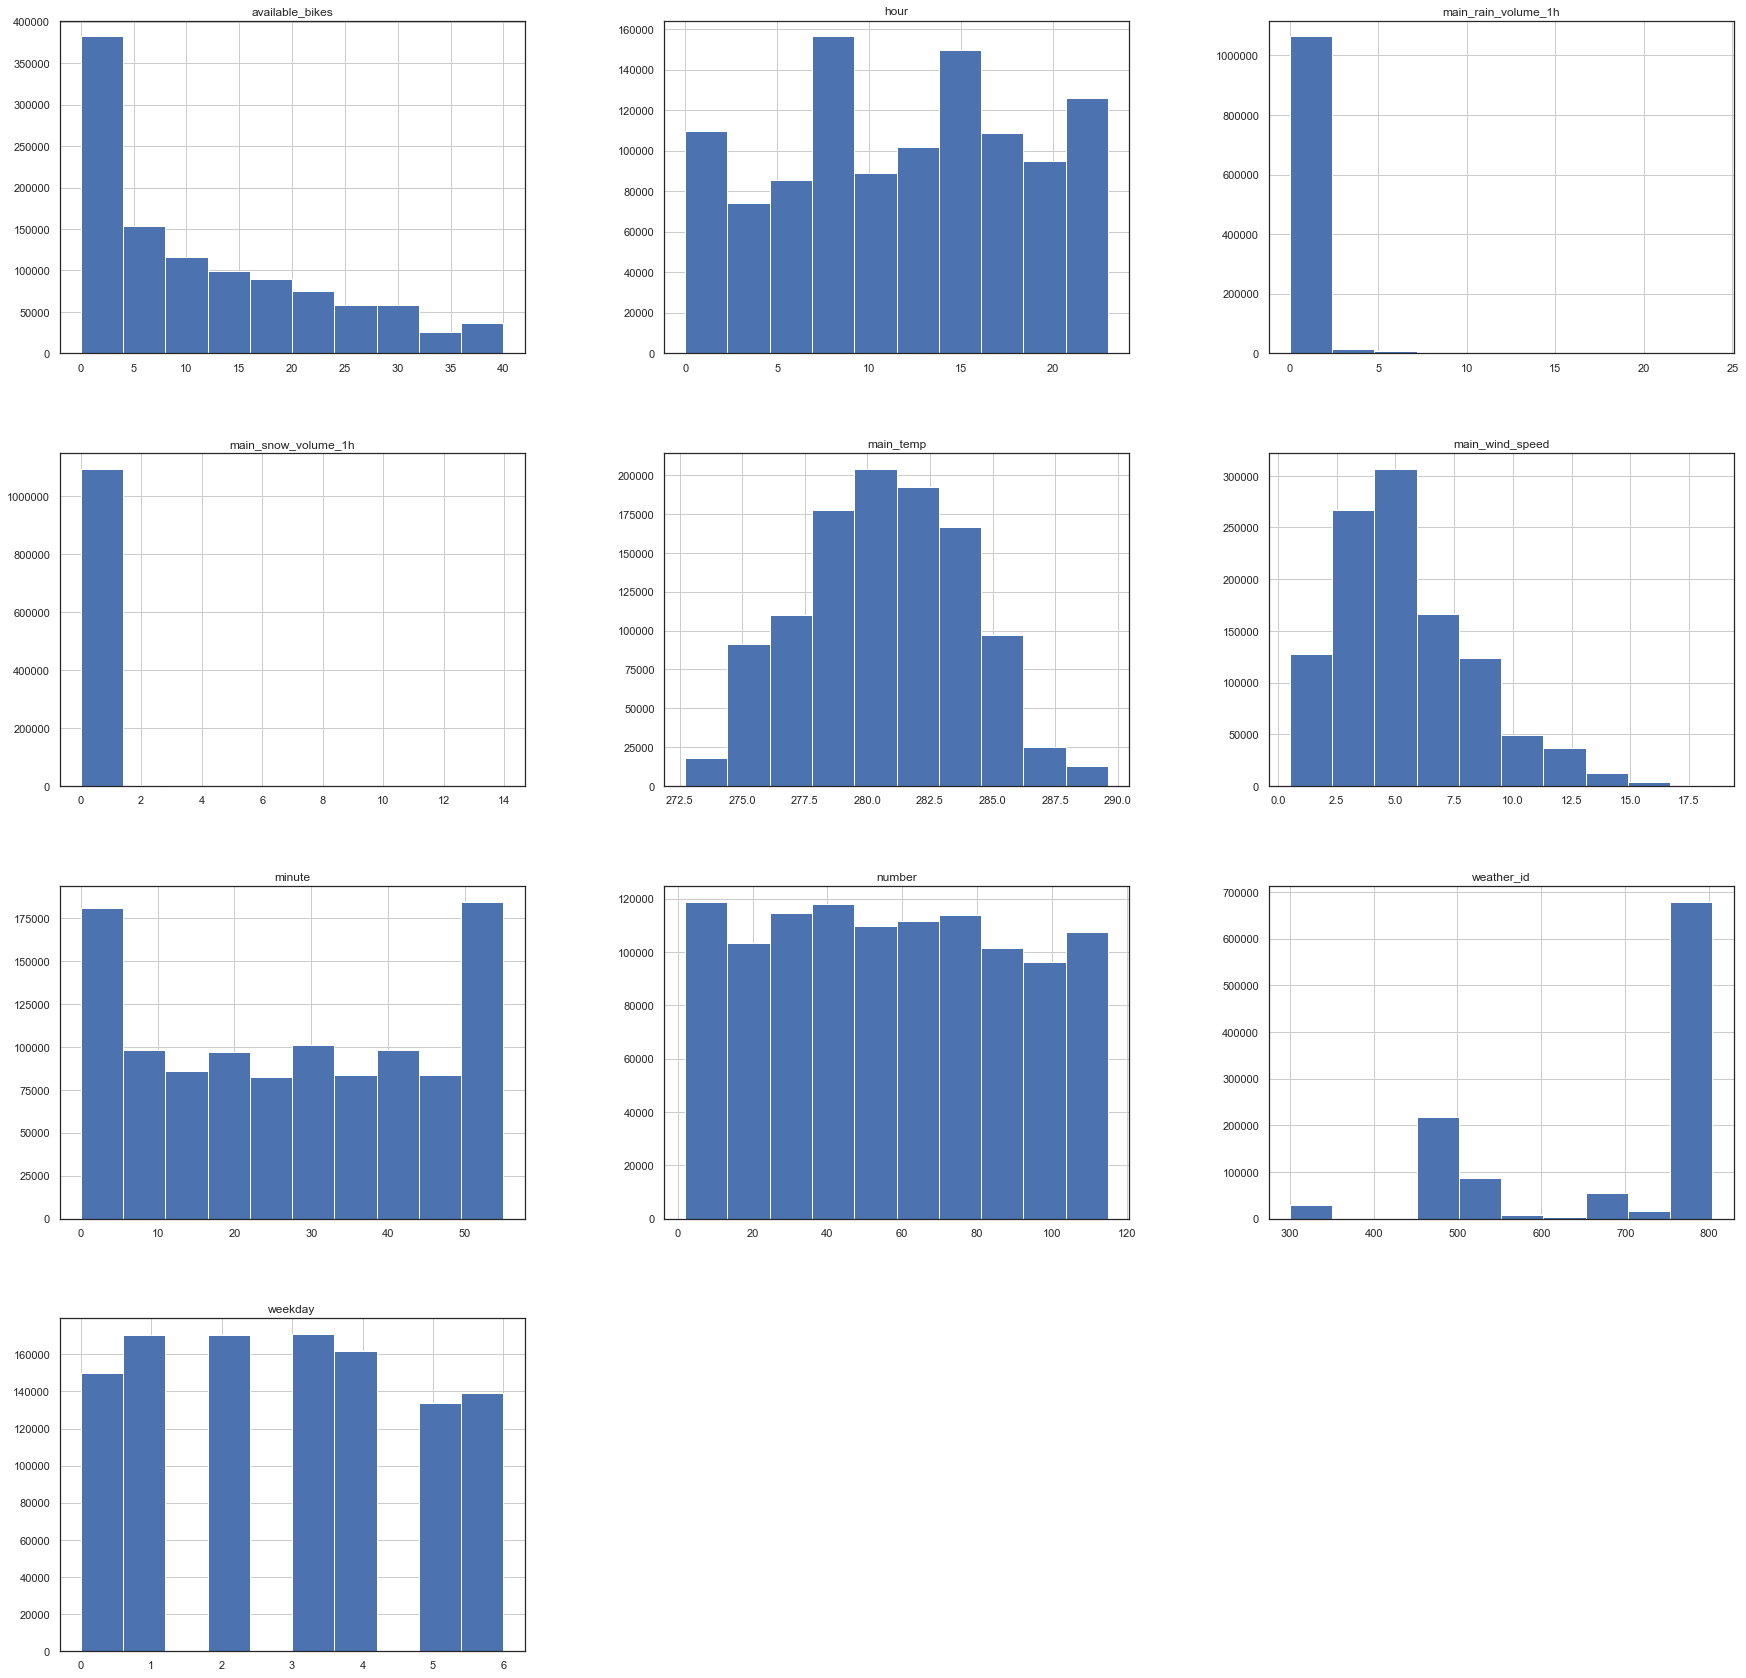

In [72]:
# View histogram of continuous columns. Banking and weekday will be shown on bar chart
df.hist(figsize=(30,30))


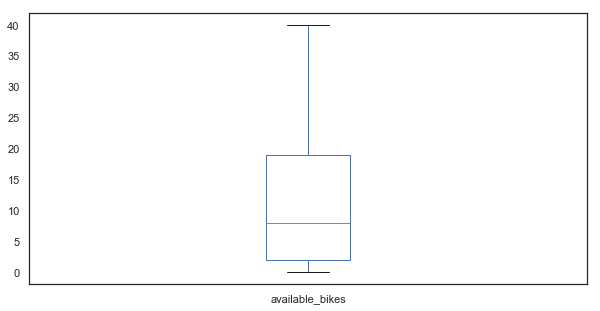

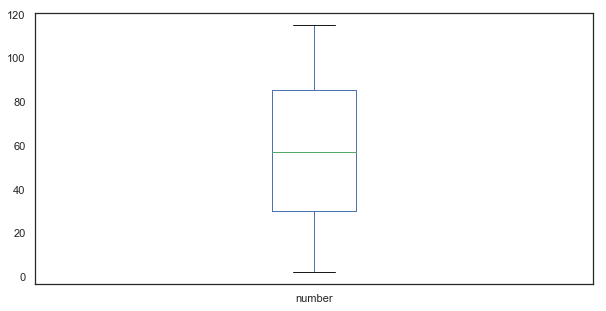

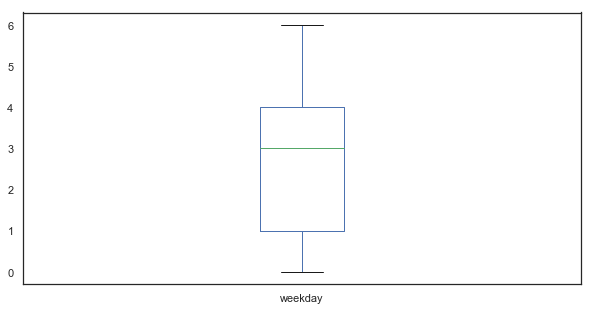

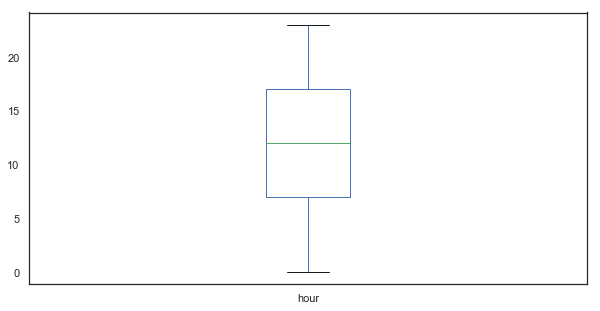

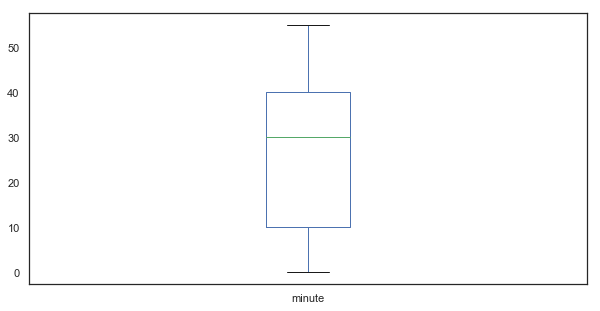

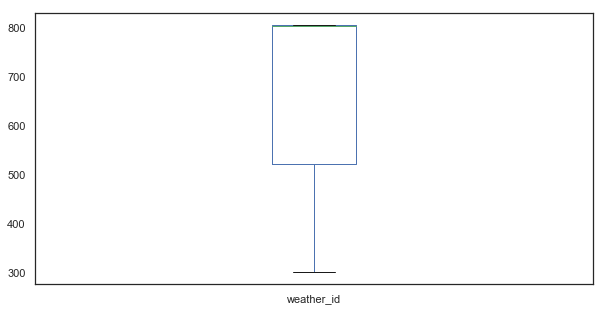

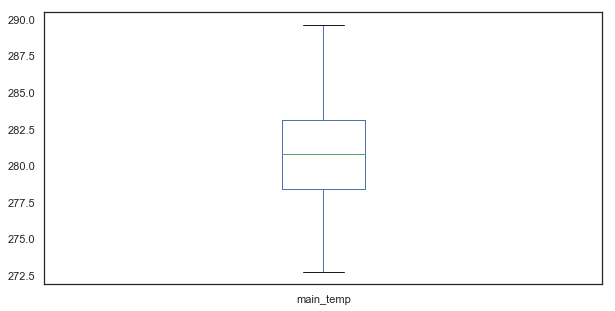

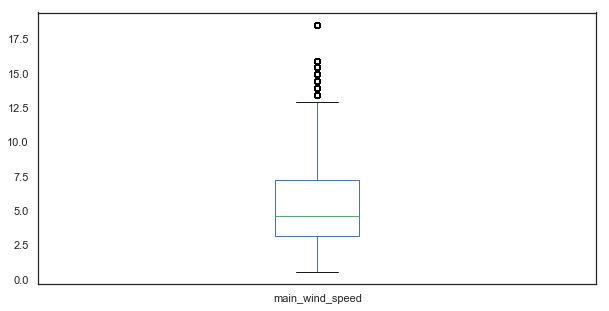

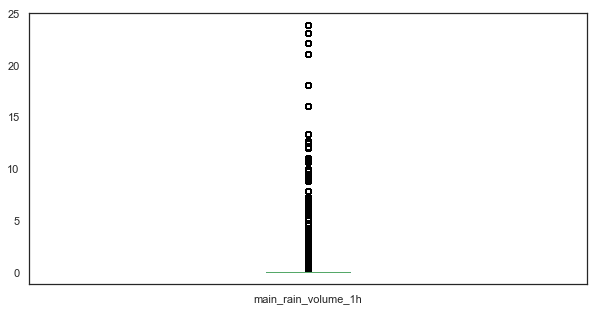

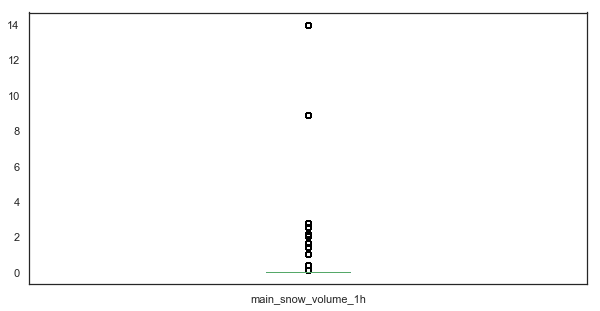

In [73]:
for column in df:
    df[column].plot(kind = 'box', figsize=(10,5))
    plt.show()
    

In [75]:
df.hour.value_counts()

17    55840
8     55184
18    52903
16    52773
13    51453
7     51289
12    50164
9     49946
19    49172
14    48902
15    48163
20    45761
6     44671
11    44542
10    44504
21    43238
22    42330
5     40755
23    40344
3     38192
0     37506
2     37090
4     35970
1     35201
Name: hour, dtype: int64

In [76]:
# Seperate out weekdays into seperate columns with 1 or 0 value
# Avoid applying weighted importance to days

df['Monday'] = np.where(df['weekday'] == 0, 1,0)
df['Tuesday'] = np.where(df['weekday'] == 1, 1,0)
df['Wednesday'] = np.where(df['weekday'] == 2, 1,0)
df['Thursday'] = np.where(df['weekday'] == 3, 1,0)
df['Friday'] = np.where(df['weekday'] == 4, 1,0)
df['Saturday'] = np.where(df['weekday'] == 5, 1,0)
df['Sunday'] = np.where(df['weekday'] == 6, 1,0)

In [77]:
df.weather_id.unique()

array([802., 801., 803., 500., 520., 521., 300., 800., 741., 701., 501.,
       502., 503., 602., 611., 601., 600., 310., 612., 804.])

In [78]:
# Seperate out the weather ids also. 
# Avoid weighting the ids - get description from db
# Join all cloud columns together - rain seperate as likely to affect bike usage

df['clouds'] = np.where((df['weather_id'] < 900) & (df['weather_id'] >= 800) , 1,0)
df['atmosphere'] = np.where((df['weather_id'] < 800) & (df['weather_id'] >= 700) , 1,0)
df['snow'] = np.where((df['weather_id'] < 700) & (df['weather_id'] >= 600) , 1,0)
df['light_rain'] = np.where(df['weather_id'] == 500, 1,0)
df['rain'] = np.where((df['weather_id'] < 600) & (df['weather_id'] >= 501), 1,0)
df['light_drizzle'] = np.where(df['weather_id'] == 300, 1,0)
df['drizzle'] = np.where((df['weather_id'] < 400) & (df['weather_id'] >= 301), 1,0)
df['thunderstorm'] = np.where((df['weather_id'] < 300) & (df['weather_id'] >= 200), 1,0)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text xticklabel objects>)

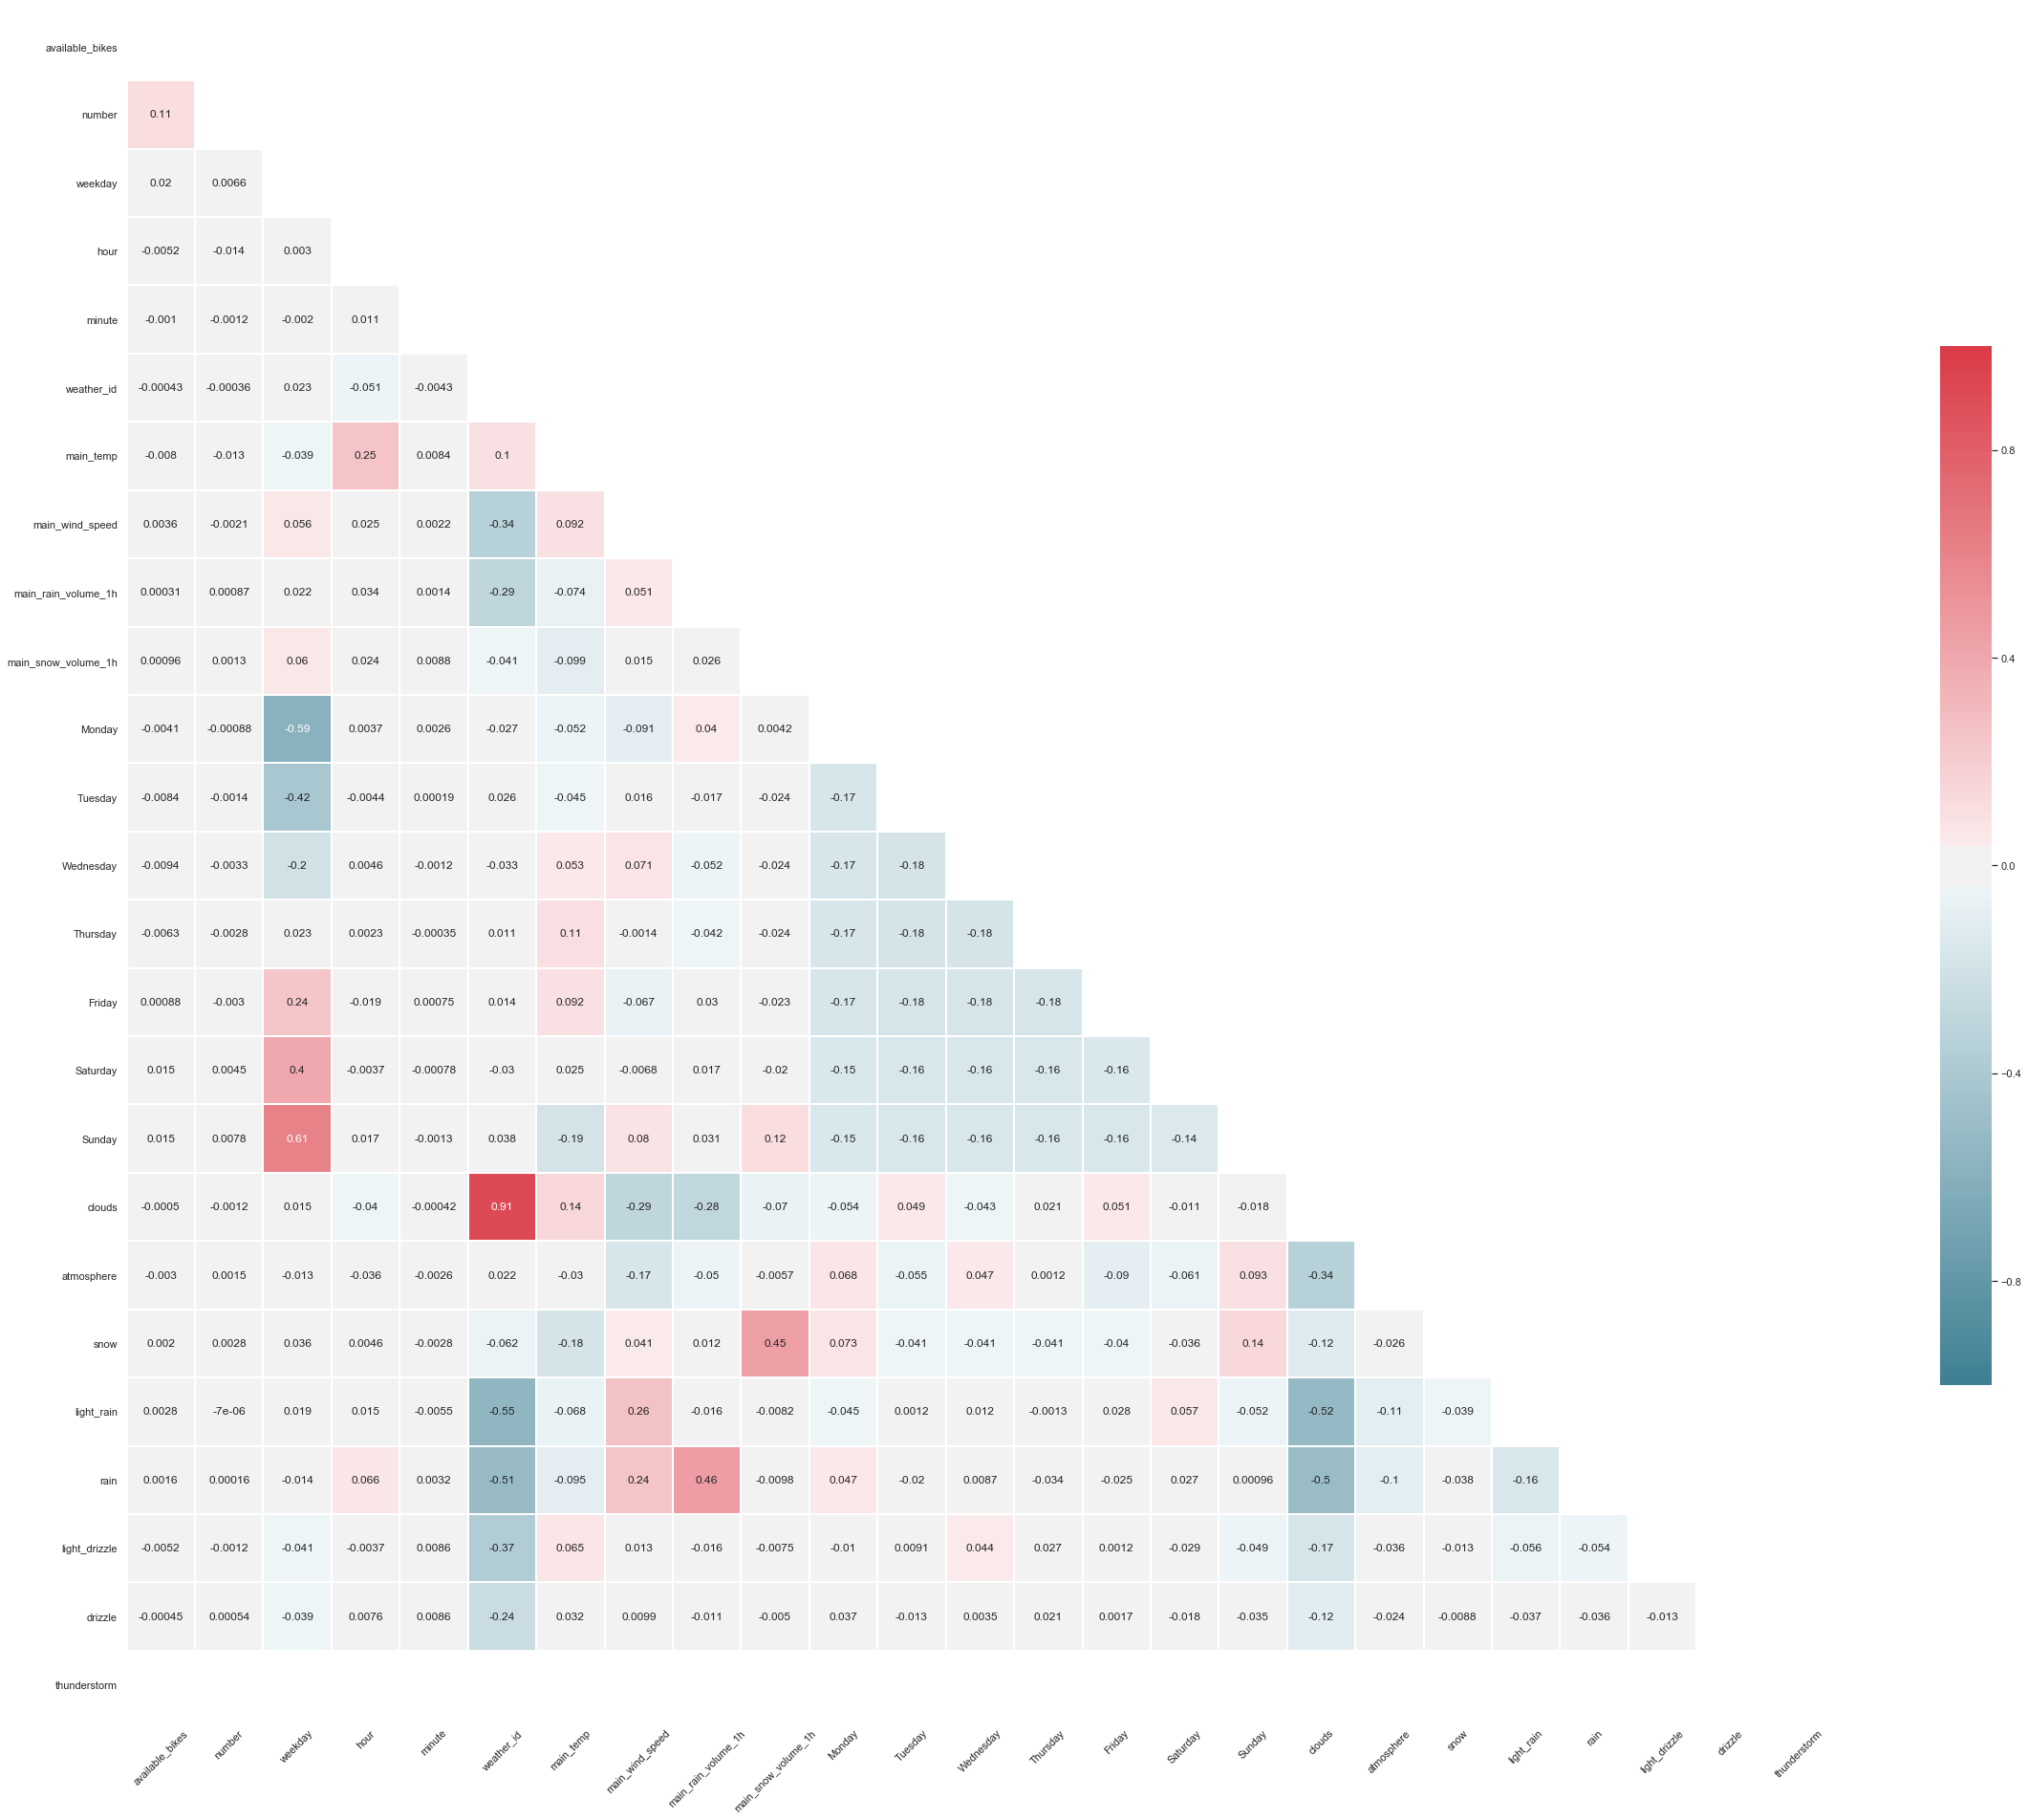

In [81]:
# Create correclation matrix
sns.set(style='white')
corr_features = df.columns
corr = df[corr_features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=1, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [82]:
# Can drop weekday and weather_id 
df.drop(['weekday', 'weather_id'], axis = 1, inplace = True)

In [84]:
df.to_csv('bike_weather_data.csv')